In [1]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,confusion_matrix ,precision_score, recall_score, f1_score, classification_report ,roc_curve, roc_auc_score ,roc_curve, auc, ConfusionMatrixDisplay , RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline


In [2]:
credit_aproval = pd.read_excel('treino.xlsx',index_col=[0])
validation_credit_aproval  = pd.read_excel("teste.xlsx",index_col=[0])

In [3]:
credit_aproval.head() # as variaveis ja sao componentes principais


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V13,V14,V15,V16,V17,V18,V19,V20,V21,Class
id,,,,,,,,,,,,,,,,,,,,,
1,-0.299468,0.533339,0.592928,0.094916,0.015414,0.019142,0.045814,0.177430,-0.040845,-0.201868,...,-0.006907,0.082039,0.783691,0.046401,-0.181900,0.201659,0.186339,0.052175,0.081669,0
2,0.529493,-0.094837,0.341711,0.568313,-0.318345,0.201856,-0.302414,0.208240,0.290601,-0.005605,...,-0.934574,0.248362,0.231307,-0.121390,0.045858,-0.088862,-0.320489,-0.132945,0.051778,0
3,0.605630,-0.024632,-0.042535,-0.023267,-0.135464,-0.141456,0.093773,-0.093751,-0.586908,0.282549,...,0.681119,-0.082467,-0.037362,-0.923501,0.024895,0.135814,-0.367899,-0.084424,-0.273891,0
4,-0.346173,0.647783,0.473604,-0.165712,0.127780,-0.221239,0.295904,0.076857,-0.220782,-0.110628,...,0.560604,0.001884,0.409169,0.236170,-0.362497,-0.085438,0.210089,0.112295,-0.136954,0
5,0.240050,-0.688908,0.525568,0.434648,-0.371745,0.799044,-0.332958,0.227423,0.783561,-0.423634,...,0.561863,-0.483898,0.041915,-0.616440,0.548586,-0.956886,-0.379454,0.235959,0.035924,0


In [4]:
credit_aproval.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V13,V14,V15,V16,V17,V18,V19,V20,V21,Class
id,,,,,,,,,,,,,,,,,,,,,
164227,0.945540,-0.636454,-1.891954,-0.694469,1.006394,1.333040,0.075870,0.200967,-0.551412,0.429079,...,-0.062475,0.457187,-0.036584,-1.154964,-0.020712,0.595263,-0.140924,-0.097852,-0.090685,0
164228,0.069862,0.474324,-1.456827,-1.092415,0.941858,-0.528412,0.862812,0.009045,-0.411747,-0.128967,...,-0.035620,0.655400,-0.946454,-0.159390,-0.458698,0.049198,-0.097779,-0.058269,0.245734,0
164229,1.029171,-0.019496,-0.964276,0.165058,0.135064,-0.367832,-0.086939,0.072412,0.424644,-0.068249,...,-1.968847,0.015673,0.014050,0.441783,0.195901,0.503895,0.151688,-0.192415,-0.153320,0
164230,1.039613,-1.081195,-0.892917,-1.402444,0.276423,2.019006,-1.077950,0.511892,-0.432621,0.768096,...,-0.127359,-0.212865,0.332778,-0.168317,0.150983,0.195624,0.018885,-0.095492,0.054955,0
164231,-0.215879,0.649585,-0.285801,-0.580750,0.570882,-0.629435,0.850776,-0.227290,-0.278489,-0.024727,...,0.361352,0.262834,-0.463130,-0.189906,-0.320088,-0.080870,0.017235,0.029066,0.112815,0


In [5]:
credit_aproval.shape

(164231, 22)

In [6]:
credit_aproval.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164231 entries, 1 to 164231
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      164231 non-null  float64
 1   V2      164231 non-null  float64
 2   V3      164231 non-null  float64
 3   V4      164231 non-null  float64
 4   V5      164231 non-null  float64
 5   V6      164231 non-null  float64
 6   V7      164231 non-null  float64
 7   V8      164231 non-null  float64
 8   V9      164231 non-null  float64
 9   V10     164231 non-null  float64
 10  V11     164231 non-null  float64
 11  V12     164231 non-null  float64
 12  V13     164231 non-null  float64
 13  V14     164231 non-null  float64
 14  V15     164231 non-null  float64
 15  V16     164231 non-null  float64
 16  V17     164231 non-null  float64
 17  V18     164231 non-null  float64
 18  V19     164231 non-null  float64
 19  V20     164231 non-null  float64
 20  V21     164231 non-null  float64
 21  Class   16

In [7]:
credit_aproval.isna().any()

V1       False
V2       False
V3       False
V4       False
V5       False
V6       False
V7       False
V8       False
V9       False
V10      False
V11      False
V12      False
V13      False
V14      False
V15      False
V16      False
V17      False
V18      False
V19      False
V20      False
V21      False
Class    False
dtype: bool

In [8]:
print(credit_aproval.describe())

                  V1             V2             V3             V4  \
count  164231.000000  164231.000000  164231.000000  164231.000000   
mean        0.020816       0.029036       0.274890       0.023903   
std         0.709996       0.592437       0.580047       0.631710   
min       -14.903862     -19.758520      -9.861436      -2.631825   
25%        -0.445887      -0.296836      -0.048311      -0.398327   
50%        -0.026290       0.023532       0.359776       0.018997   
75%         0.590285       0.422750       0.651813       0.456228   
max         1.215247       8.034236       3.072789       6.134471   

                  V5             V6             V7             V8  \
count  164231.000000  164231.000000  164231.000000  164231.000000   
mean       -0.063158       0.087255      -0.061199       0.081759   
std         0.547314       0.615860       0.414050       0.371658   
min       -18.795629      -8.178917     -10.938095     -14.285038   
25%        -0.422133      -0.3112

<AxesSubplot:>

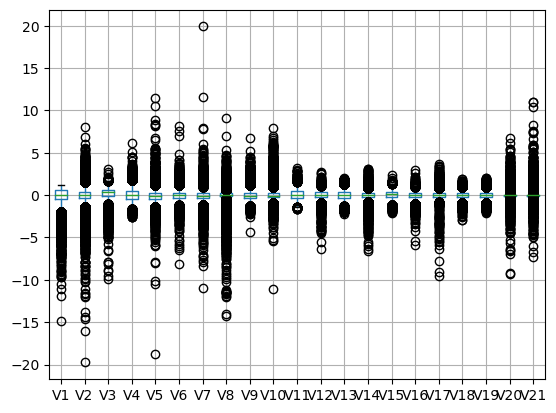

In [9]:
credit_aproval.iloc[:,:-1].boxplot() # muitos outliers

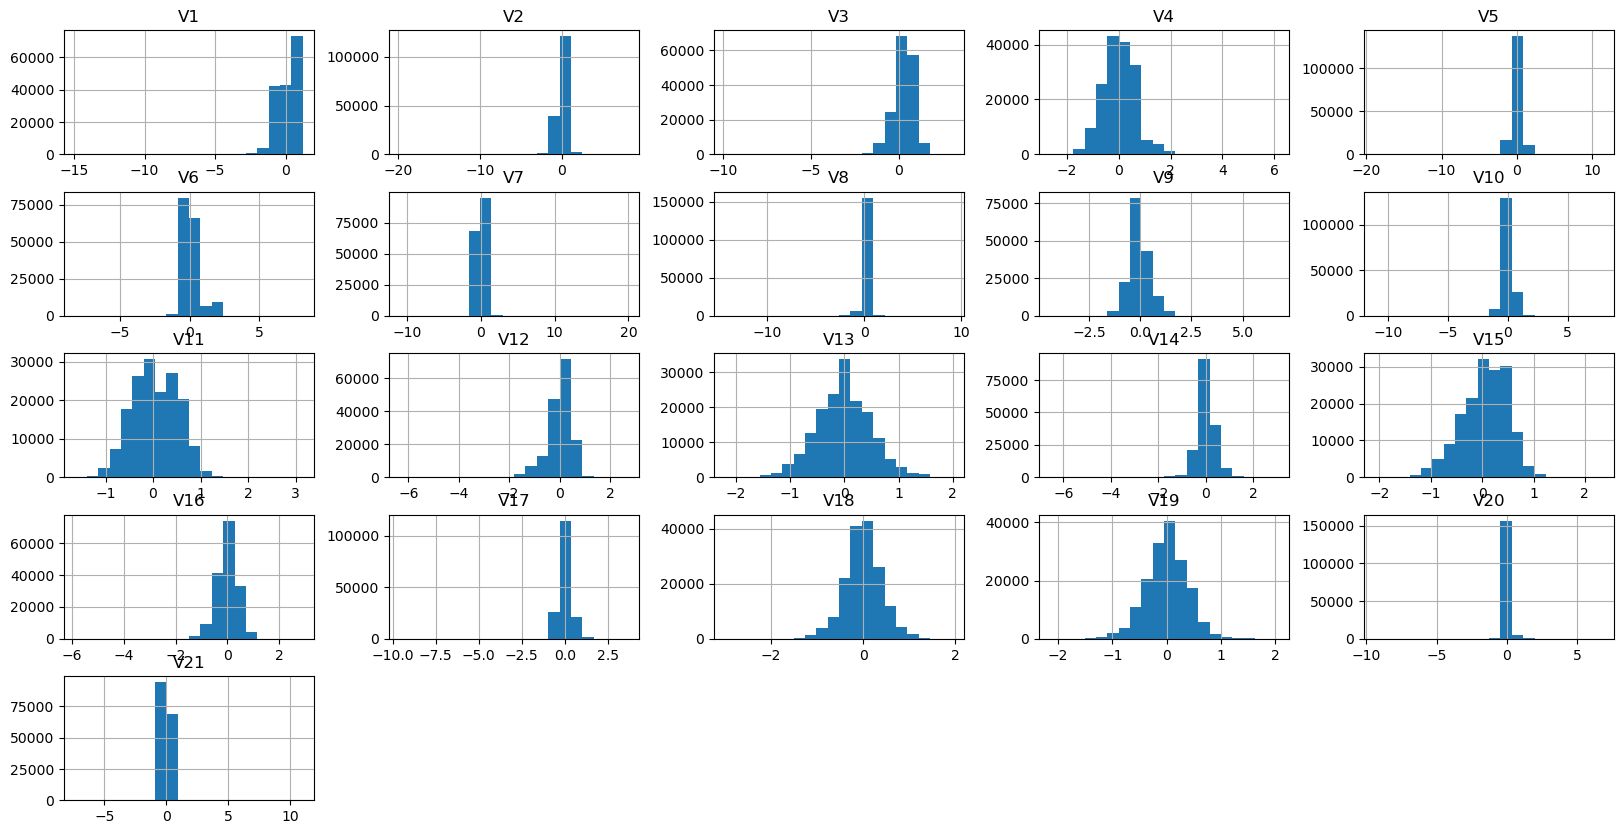

In [10]:
credit_aproval.drop("Class",axis=1).hist(bins=20)
plt.gcf().set_size_inches(20, 10)

In [11]:
credit_aproval['Class'].value_counts()/  credit_aproval.shape[0]

0    0.997851
1    0.002149
Name: Class, dtype: float64

In [12]:

from scipy import stats


for col in credit_aproval.drop("Class",axis=1):
    print("#" *100)
    print(col)
    x = credit_aproval[col].values
    y = credit_aproval['Class'].values

    # Calculate the Point-Biserial Correlation Coefficient
    pb_coeff, p_value = stats.pointbiserialr(x, y)

    print(f"Point-Biserial Correlation Coefficient: {pb_coeff:.4f}")
    print(f"p-value: {p_value:.4f}")


####################################################################################################
V1
Point-Biserial Correlation Coefficient: -0.0364
p-value: 0.0000
####################################################################################################
V2
Point-Biserial Correlation Coefficient: 0.0120
p-value: 0.0000
####################################################################################################
V3
Point-Biserial Correlation Coefficient: -0.0541
p-value: 0.0000
####################################################################################################
V4
Point-Biserial Correlation Coefficient: 0.0283
p-value: 0.0000
####################################################################################################
V5
Point-Biserial Correlation Coefficient: 0.0090
p-value: 0.0003
####################################################################################################
V6
Point-Biserial Correlation Coefficient: -0.0068
p-value: 0.

<AxesSubplot:>

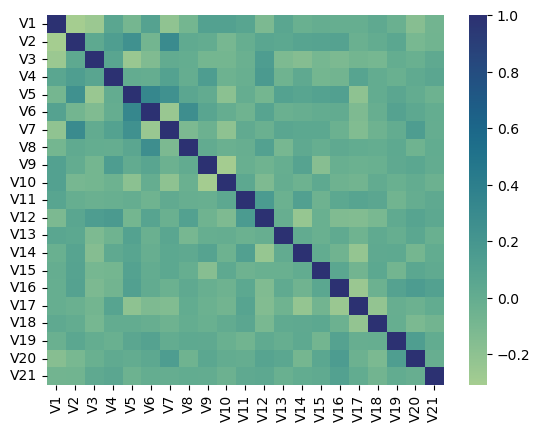

In [13]:
sns.heatmap(credit_aproval.iloc[:,:-1].corr(),cmap="crest") # variaveis sao pouco correlacionadas  entre si

<AxesSubplot:>

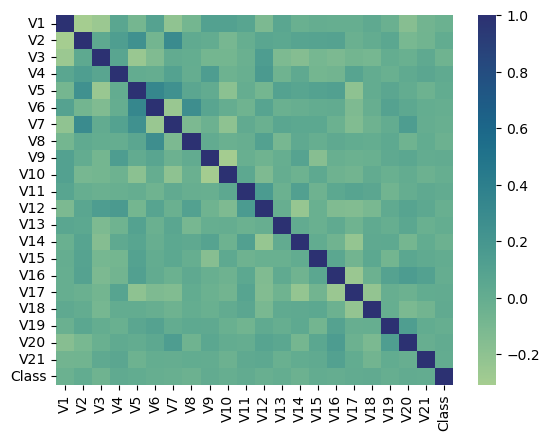

In [14]:
sns.heatmap(credit_aproval.corr(),cmap="crest") # variaveis sao pouco correlacionadas 

In [15]:
credit_aproval

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V13,V14,V15,V16,V17,V18,V19,V20,V21,Class
id,,,,,,,,,,,,,,,,,,,,,
1,-0.299468,0.533339,0.592928,0.094916,0.015414,0.019142,0.045814,0.177430,-0.040845,-0.201868,...,-0.006907,0.082039,0.783691,0.046401,-0.181900,0.201659,0.186339,0.052175,0.081669,0
2,0.529493,-0.094837,0.341711,0.568313,-0.318345,0.201856,-0.302414,0.208240,0.290601,-0.005605,...,-0.934574,0.248362,0.231307,-0.121390,0.045858,-0.088862,-0.320489,-0.132945,0.051778,0
3,0.605630,-0.024632,-0.042535,-0.023267,-0.135464,-0.141456,0.093773,-0.093751,-0.586908,0.282549,...,0.681119,-0.082467,-0.037362,-0.923501,0.024895,0.135814,-0.367899,-0.084424,-0.273891,0
4,-0.346173,0.647783,0.473604,-0.165712,0.127780,-0.221239,0.295904,0.076857,-0.220782,-0.110628,...,0.560604,0.001884,0.409169,0.236170,-0.362497,-0.085438,0.210089,0.112295,-0.136954,0
5,0.240050,-0.688908,0.525568,0.434648,-0.371745,0.799044,-0.332958,0.227423,0.783561,-0.423634,...,0.561863,-0.483898,0.041915,-0.616440,0.548586,-0.956886,-0.379454,0.235959,0.035924,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164227,0.945540,-0.636454,-1.891954,-0.694469,1.006394,1.333040,0.075870,0.200967,-0.551412,0.429079,...,-0.062475,0.457187,-0.036584,-1.154964,-0.020712,0.595263,-0.140924,-0.097852,-0.090685,0
164228,0.069862,0.474324,-1.456827,-1.092415,0.941858,-0.528412,0.862812,0.009045,-0.411747,-0.128967,...,-0.035620,0.655400,-0.946454,-0.159390,-0.458698,0.049198,-0.097779,-0.058269,0.245734,0
164229,1.029171,-0.019496,-0.964276,0.165058,0.135064,-0.367832,-0.086939,0.072412,0.424644,-0.068249,...,-1.968847,0.015673,0.014050,0.441783,0.195901,0.503895,0.151688,-0.192415,-0.153320,0


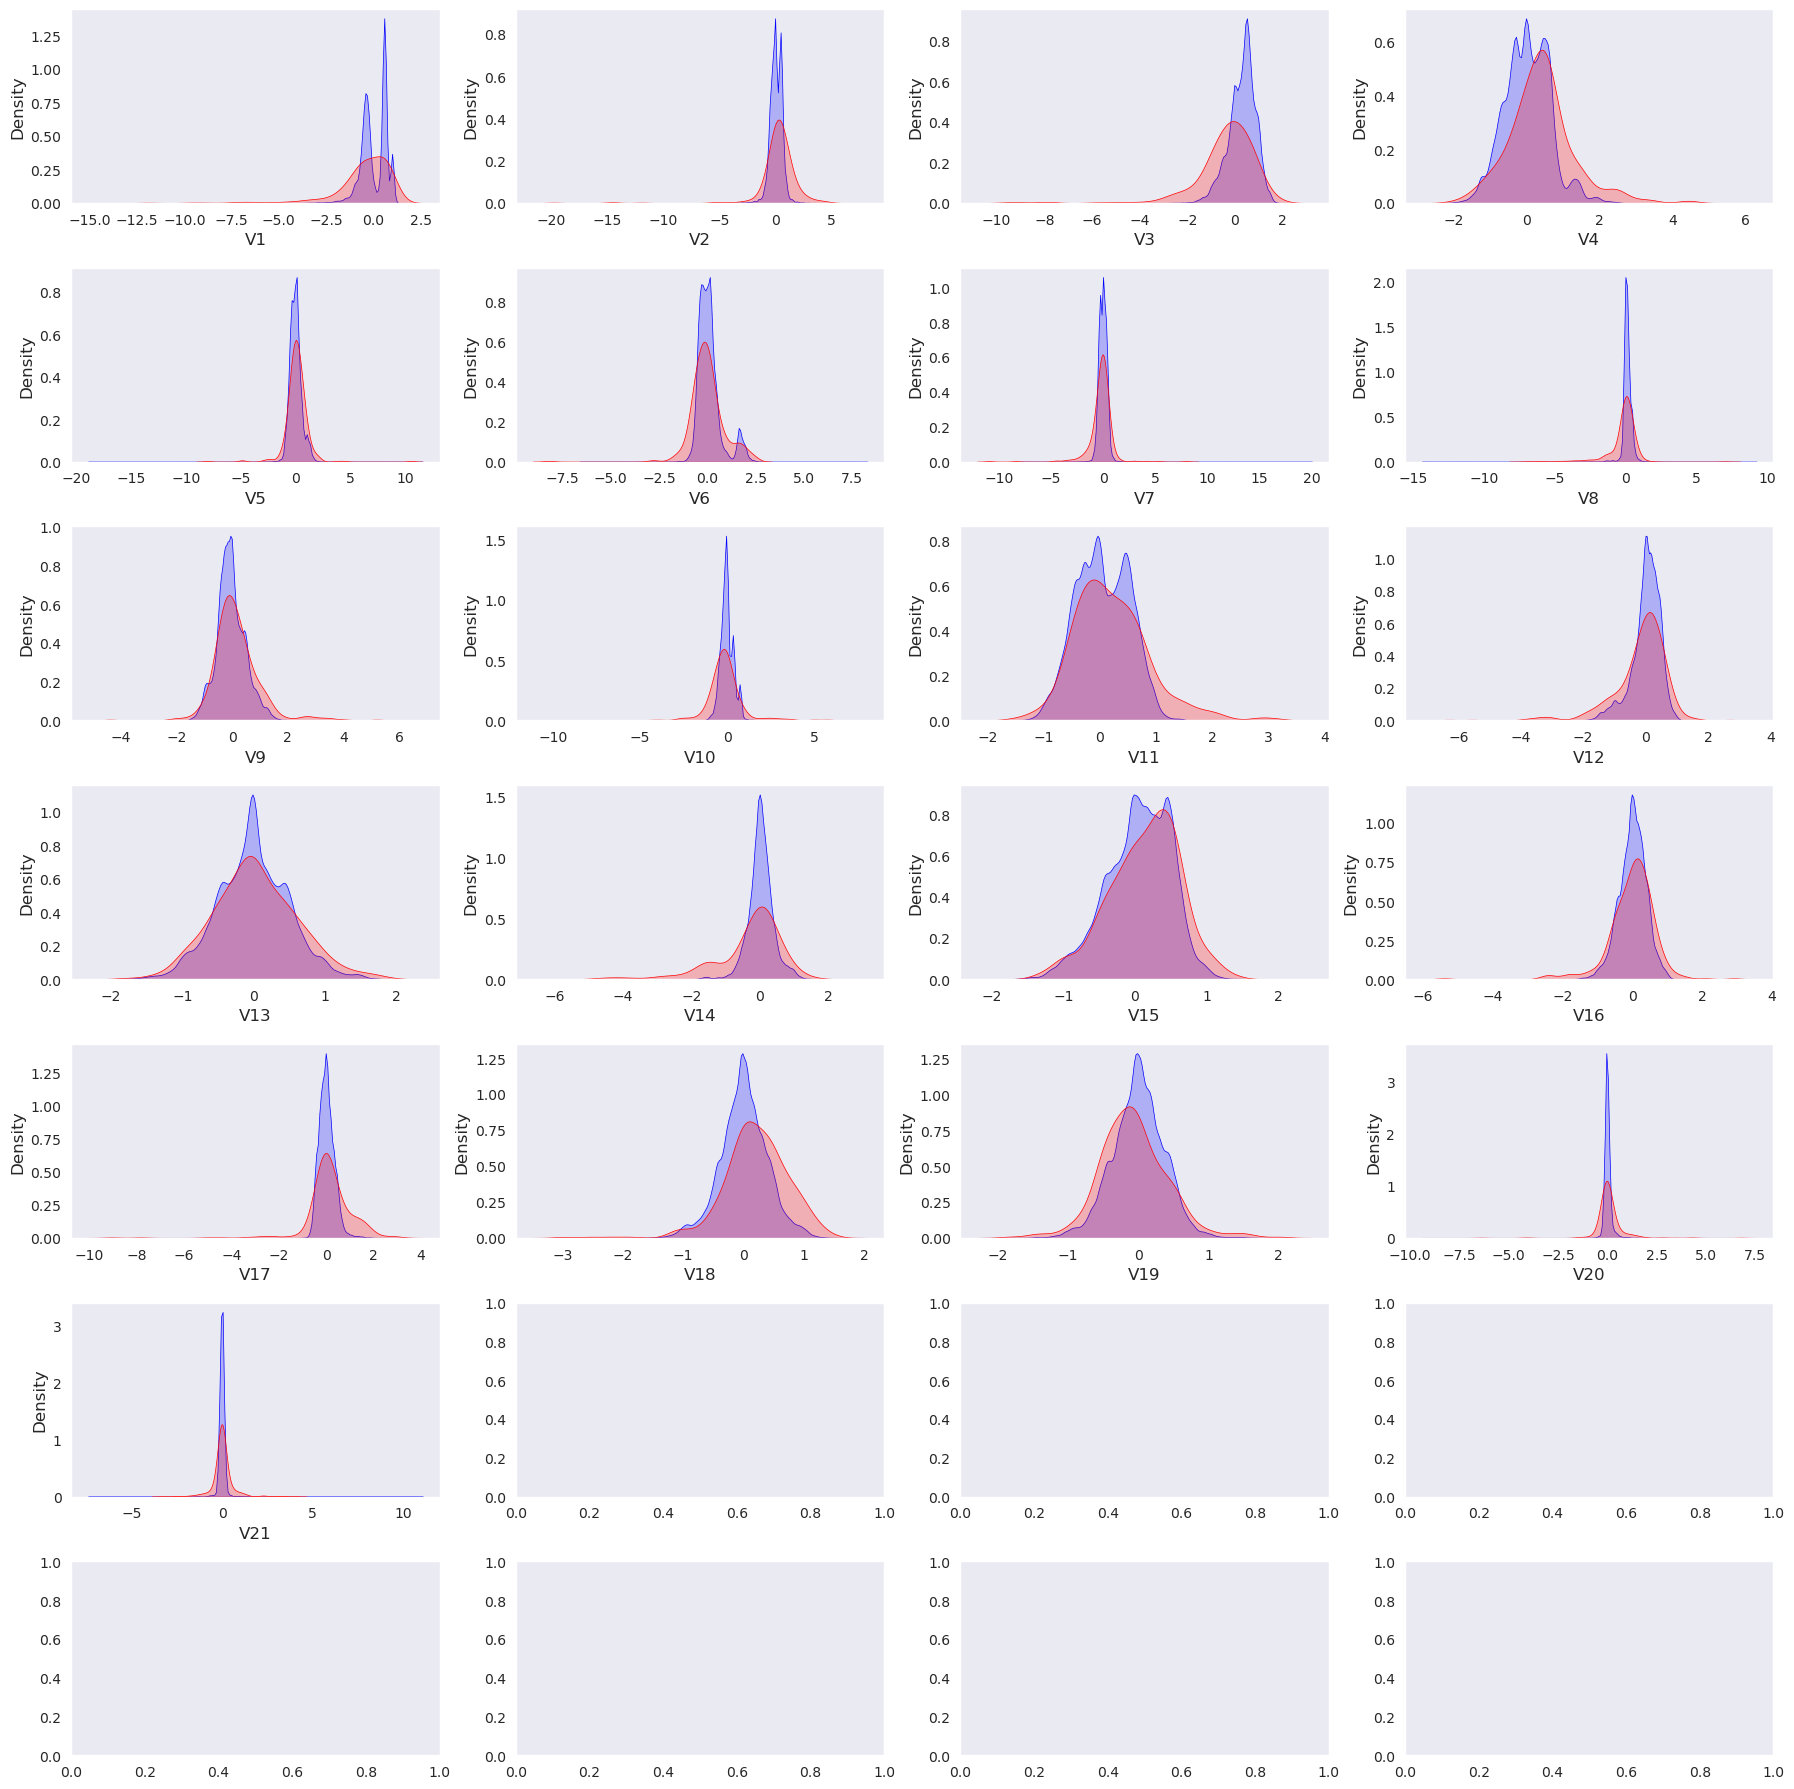

In [16]:
# configurações adicionais
plt.style.use('ggplot')
sns.set_style('dark')

# plotar gráfico de densidade
## criar variável com as colunas PCA (V1, V2, V3, ..., V28)
pca_columns = credit_aproval.drop(['Class'], axis=1).columns

## segmentar transações legítimas e fraudulentas
class_0 = credit_aproval[credit_aproval.Class == 0]
class_1 = credit_aproval[credit_aproval.Class == 1]

# configurar gráfico
fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

# loop para plotar todas as 28 variáveis
idx = 0
for col in pca_columns:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(class_0[col], shade=True, color='b')
    sns.kdeplot(class_1[col], shade=True, color='r')

plt.tight_layout()

----------

# Logistc Regression

## Simple Logit:

- Sem realizar downsampling ou upsampling

In [17]:
X = credit_aproval.drop("Class", axis = 1)
y = credit_aproval["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 42)


In [18]:
train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])

test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])

# check the proportions
print(train_1/y_train.shape[0]) 
print(test_1/y_test.shape[0])

0.001997190942820261
0.0026060694627112863


In [19]:
logReg_v1 = LogisticRegression(class_weight='balanced')
logReg_v1.fit(X_train,y_train)
y_pred_train =  logReg_v1.predict(X_train)
y_pred_test =  logReg_v1.predict(X_test)

y_pred_train_proba =  logReg_v1.predict_proba(X_train)
y_pred_test_proba =  logReg_v1.predict_proba(X_test)

In [20]:
y_pred_test_proba[:, 1]

array([0.277054  , 0.1939308 , 0.68350489, ..., 0.23895591, 0.06430513,
       0.35910797])

In [21]:
# Calculando a ROC e o Gini - Treinamento
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train_proba[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

print("AUC - Treinamento : %f" % roc_auc_train)
print("Gini - Treinamento: ", round(2*roc_auc_train-1,2))
print("\n")

# Calculando a ROC e o Gini - Teste
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test_proba[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

print("AUC - Teste : %f" % roc_auc_test)
print("Gini - Teste: ", round(2*roc_auc_test-1,2))

AUC - Treinamento : 0.825244
Gini - Treinamento:  0.65


AUC - Teste : 0.806607
Gini - Teste:  0.61


In [22]:
def get_metrics(model,y_true,X_true):
    y_pred =  model.predict(X_true)
    y_pred_proba =  model.predict_proba(X_true)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba[:, 1] )
    auc = roc_auc_score(y_true, y_pred_proba[:, 1] )
    cm = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred)

    metrics = {
        'Accuracy' : accuracy,
        'Precision' : precision,
        'Recall' : recall,
        'F1-Score' : f1,
        'False Positive Ratio': fpr,
        'True Positive Ratio':tpr,
        'Thresholds':thresholds,
        'Area Under the Curve': auc,
        "Gini": round(2*auc-1,2),
        'Confussion Matrix' : cm,
        'Classification Report' : report

    }

    

    return metrics



In [23]:
def  display_metrics(train_metrics_report,test_metrics_report,not_show=['Confussion Matrix','Classification Report','False Positive Ratio','True Positive Ratio','Thresholds']):
    for k in train_metrics_report.keys():
        if k not in not_show:
            print(k, " - Train : ", round(train_metrics_report[k],4))
            print(k, " - Test : ", round(test_metrics_report[k],4))
            print("-"*100)


In [24]:
train_metrics = get_metrics(logReg_v1,y_train,X_train)
test_metrics = get_metrics(logReg_v1,y_test,X_test)

In [25]:
display_metrics(train_metrics,test_metrics)

Accuracy  - Train :  0.8235
Accuracy  - Test :  0.8253
----------------------------------------------------------------------------------------------------
Precision  - Train :  0.0074
Precision  - Test :  0.0093
----------------------------------------------------------------------------------------------------
Recall  - Train :  0.6585
Recall  - Test :  0.6262
----------------------------------------------------------------------------------------------------
F1-Score  - Train :  0.0147
F1-Score  - Test :  0.0183
----------------------------------------------------------------------------------------------------
Area Under the Curve  - Train :  0.8252
Area Under the Curve  - Test :  0.8066
----------------------------------------------------------------------------------------------------
Gini  - Train :  0.65
Gini  - Test :  0.61
----------------------------------------------------------------------------------------------------


In [26]:
from matplotlib import pyplot as plt
def plot_classification_metrics(model,y_true,X_true):
    y_pred =  model.predict(X_true)
    fig, (ax1, ax2)= plt.subplots(1,2, figsize=(12, 6))
    RocCurveDisplay.from_estimator(model, X_true, y_true).plot(ax=ax2)

    ax2.plot([0,1],[0,1],'k--',label='Benchmark')
    ax2.set_title('ROC Curve Prediction')
    ax2.legend()
    
    conf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)
    ConfusionMatrixDisplay(confusion_matrix = conf_matrix).plot(ax=ax1)
    ax1.set_title('Matrix Curve')

    plt.close()


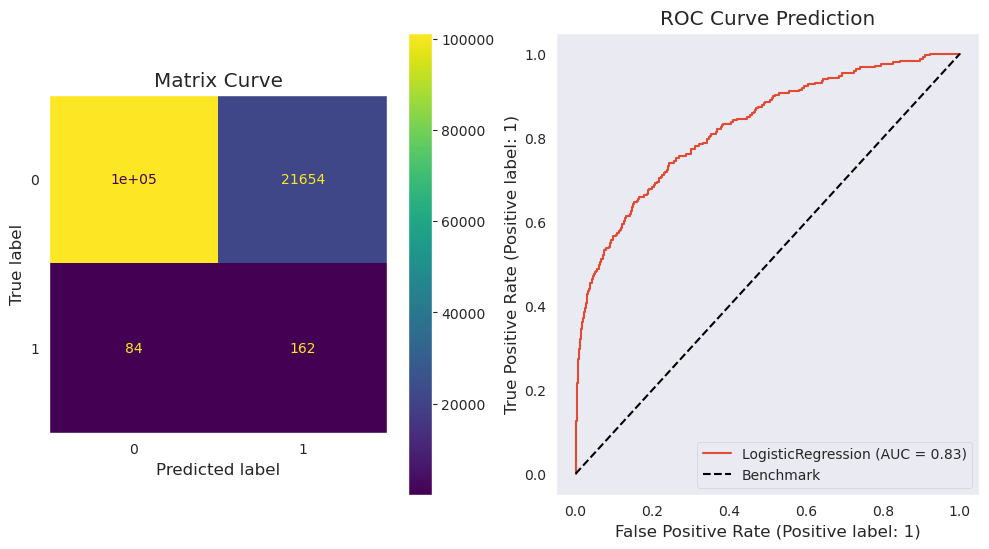

In [27]:
plot_classification_metrics(logReg_v1,y_train,X_train)

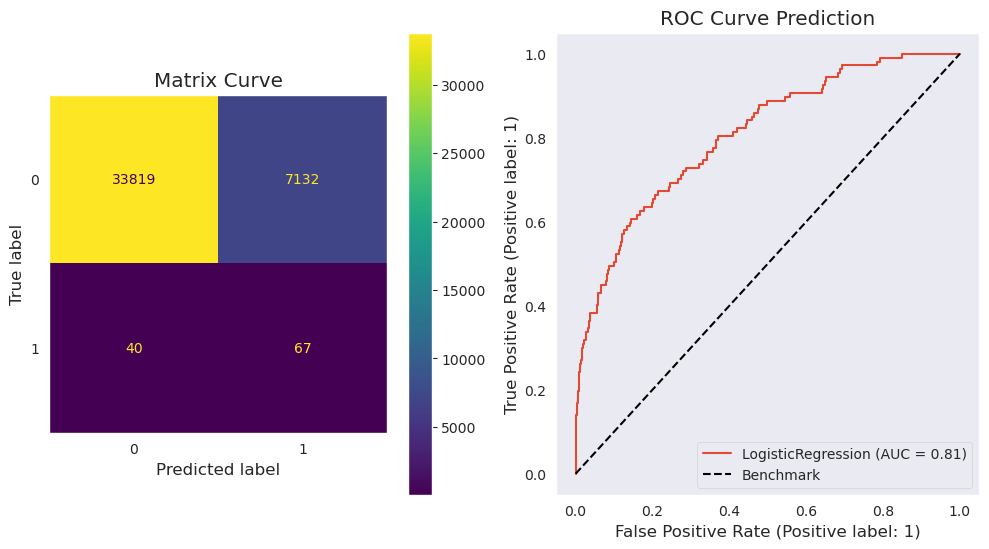

In [28]:
plot_classification_metrics(logReg_v1,y_test,X_test)

## Grid search Logistc Regression

In [29]:


pipe_lr = make_pipeline(LogisticRegression(class_weight='balanced'))

strat_kfold = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


auc_scores = cross_val_score(estimator=pipe_lr, X=X, y=y,cv=strat_kfold,n_jobs=-1,scoring='roc_auc')


# Print the AUC scores for each fold
print('AUC scores:', auc_scores)

# Compute the mean AUC score across all folds
mean_auc = auc_scores.mean()
print('Mean AUC:', mean_auc)

AUC scores: [0.73819258 0.84887897 0.79111894 0.76563688 0.7950992  0.78288295
 0.87913107 0.82606437 0.80396215 0.80779649]
Mean AUC: 0.8038763594727202


In [30]:
X = credit_aproval.drop("Class", axis = 1)
y = credit_aproval["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.85, random_state = 42)



strat_kfold = StratifiedKFold(n_splits=10, shuffle=False)

params_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2']
}



# Step 2: Perform cross-validation with hyperparameter tuning
grid_search_log_reg = GridSearchCV(LogisticRegression(class_weight='balanced',solver='liblinear',random_state = 42), params_log_reg, cv=strat_kfold, scoring='roc_auc',n_jobs=-1)
grid_search_log_reg.fit(X_train, y_train)

best_log_reg = grid_search_log_reg.best_estimator_

best_log_reg.fit(X_train, y_train)

train_metrics = get_metrics(best_log_reg,y_train,X_train)
test_metrics = get_metrics(best_log_reg,y_test,X_test)

In [31]:
grid_search_log_reg.cv_results_['mean_test_score']

array([0.80187052, 0.80521842, 0.80628428, 0.80643241, 0.80657193,
       0.80664227, 0.80667549, 0.80668072, 0.80668239, 0.80668114,
       0.80668163, 0.80668164, 0.8066814 , 0.8066814 ])

In [32]:
display_metrics(train_metrics,test_metrics)

Accuracy  - Train :  0.82
Accuracy  - Test :  0.8231
----------------------------------------------------------------------------------------------------
Precision  - Train :  0.0075
Precision  - Test :  0.0101
----------------------------------------------------------------------------------------------------
Recall  - Train :  0.6678
Recall  - Test :  0.6286
----------------------------------------------------------------------------------------------------
F1-Score  - Train :  0.0148
F1-Score  - Test :  0.0198
----------------------------------------------------------------------------------------------------
Area Under the Curve  - Train :  0.8252
Area Under the Curve  - Test :  0.806
----------------------------------------------------------------------------------------------------
Gini  - Train :  0.65
Gini  - Test :  0.61
----------------------------------------------------------------------------------------------------


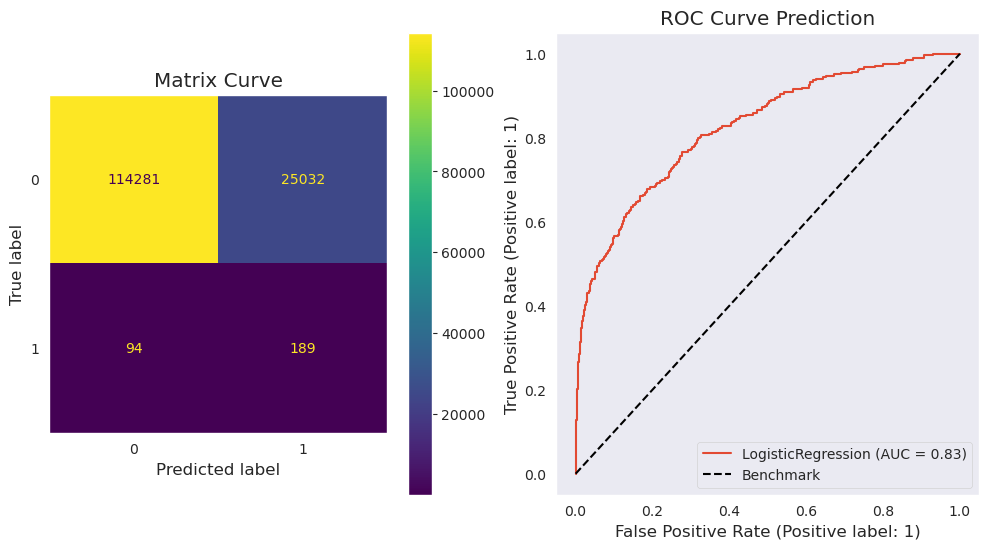

In [33]:
plot_classification_metrics(best_log_reg,y_train,X_train)

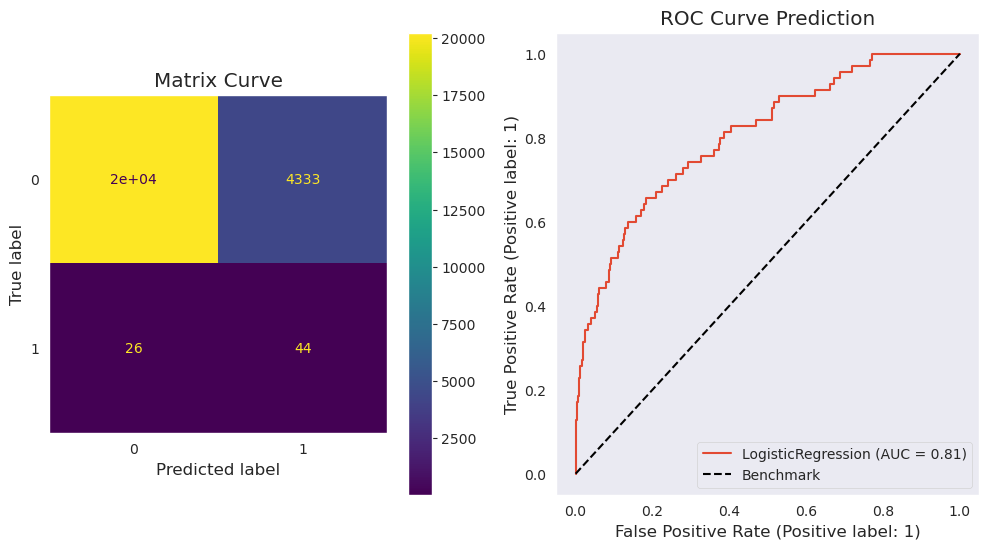

In [34]:
plot_classification_metrics(best_log_reg,y_test,X_test)

--------------------

## Dealing Data Proportions

* Oversampling (upsampling)

In [35]:
X = credit_aproval.drop("Class", axis = 1)
y = credit_aproval["Class"]

X_train, X_test, y_train, y_test = train_test_split(X , y, train_size = 0.85,stratify=y ,random_state = 42)

df_resample = pd.concat([X_train,y_train],axis=1)
df_resample.columns = credit_aproval.columns

In [36]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 



df_majority = df_resample[(df_resample['Class']==0)] 
df_minority = df_resample[(df_resample['Class']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples=df_resample[df_resample['Class'] == 0].shape[0],# to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [37]:
df_upsampled ['Class'].value_counts()

1    139296
0    139296
Name: Class, dtype: int64

In [38]:
X_upsamp = df_upsampled.drop("Class", axis = 1)
y_upsamp = df_upsampled ["Class"]



strat_kfold = StratifiedKFold(n_splits=10, shuffle=False)

params_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2']
}



# Step 2: Perform cross-validation with hyperparameter tuning
grid_search_log_reg = GridSearchCV(LogisticRegression(class_weight='balanced',solver='liblinear'), params_log_reg, cv=strat_kfold, scoring='roc_auc',n_jobs=-1)
grid_search_log_reg.fit(X_upsamp , y_upsamp )

best_log_reg = grid_search_log_reg.best_estimator_
best_log_reg.fit(X_upsamp , y_upsamp )

train_metrics = get_metrics(best_log_reg,y_upsamp ,X_upsamp )
test_metrics = get_metrics(best_log_reg,y_test,X_test)




In [39]:
grid_search_log_reg.cv_results_['mean_test_score']

array([0.81553446, 0.81767091, 0.81807258, 0.81833104, 0.81839687,
       0.81841551, 0.81842237, 0.81842376, 0.81842436, 0.8184255 ,
       0.81842413, 0.81842517, 0.81842548, 0.81842522])

In [40]:
display_metrics(train_metrics,test_metrics)

Accuracy  - Train :  0.7413
Accuracy  - Test :  0.8152
----------------------------------------------------------------------------------------------------
Precision  - Train :  0.7843
Precision  - Test :  0.0081
----------------------------------------------------------------------------------------------------
Recall  - Train :  0.6657
Recall  - Test :  0.6981
----------------------------------------------------------------------------------------------------
F1-Score  - Train :  0.7201
F1-Score  - Test :  0.016
----------------------------------------------------------------------------------------------------
Area Under the Curve  - Train :  0.8185
Area Under the Curve  - Test :  0.8485
----------------------------------------------------------------------------------------------------
Gini  - Train :  0.64
Gini  - Test :  0.7
----------------------------------------------------------------------------------------------------


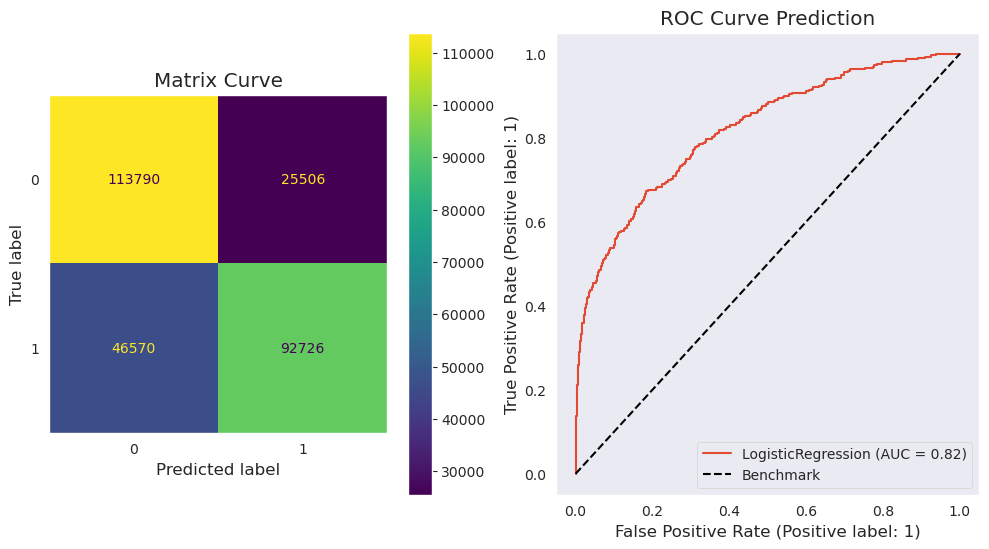

In [41]:
plot_classification_metrics(best_log_reg,y_upsamp,X_upsamp)

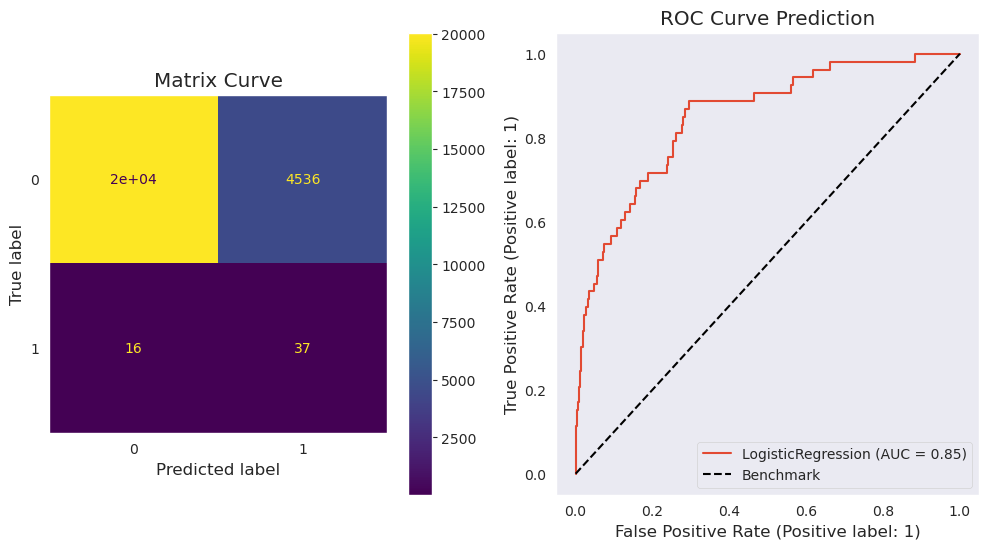

In [42]:
plot_classification_metrics(best_log_reg,y_test,X_test)

In [43]:
df_train = pd.concat([X_train,y_train],axis=1)

* SMOT

In [44]:
from imblearn.over_sampling import SMOTE
#

X = credit_aproval.drop("Class", axis = 1)
y = credit_aproval["Class"]

X_train, X_test, y_train, y_test = train_test_split(X , y, train_size = 0.85,stratify=y ,random_state = 42)

df_train = pd.concat([X_train,y_train],axis=1)
df_train.columns = credit_aproval.columns

#  Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_y = sm.fit_resample(df_train.drop('Class', axis=1), df_train['Class'])
oversampled_complete = pd.concat([pd.DataFrame(oversampled_y), pd.DataFrame(oversampled_X)], axis=1)

strat_kfold = StratifiedKFold(n_splits=10, shuffle=False)

params_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2']
}



# Step 2: Perform cross-validation with hyperparameter tuning
grid_search_log_reg = GridSearchCV(LogisticRegression(class_weight='balanced',solver='liblinear'), params_log_reg, cv=strat_kfold, scoring='roc_auc',n_jobs=-1)
grid_search_log_reg.fit(oversampled_X , oversampled_y )

best_log_reg = grid_search_log_reg.best_estimator_
best_log_reg.fit(oversampled_X , oversampled_y )

train_metrics = get_metrics(best_log_reg,oversampled_y ,oversampled_X )
test_metrics = get_metrics(best_log_reg,y_test,X_test)



In [45]:
display_metrics(train_metrics,test_metrics)

Accuracy  - Train :  0.7151
Accuracy  - Test :  0.7835
----------------------------------------------------------------------------------------------------
Precision  - Train :  0.7487
Precision  - Test :  0.0073
----------------------------------------------------------------------------------------------------
Recall  - Train :  0.6475
Recall  - Test :  0.7358
----------------------------------------------------------------------------------------------------
F1-Score  - Train :  0.6944
F1-Score  - Test :  0.0144
----------------------------------------------------------------------------------------------------
Area Under the Curve  - Train :  0.815
Area Under the Curve  - Test :  0.8477
----------------------------------------------------------------------------------------------------
Gini  - Train :  0.63
Gini  - Test :  0.7
----------------------------------------------------------------------------------------------------


In [46]:
print(test_metrics['Classification Report'])

              precision    recall  f1-score   support

           0       1.00      0.78      0.88     24582
           1       0.01      0.74      0.01        53

    accuracy                           0.78     24635
   macro avg       0.50      0.76      0.45     24635
weighted avg       1.00      0.78      0.88     24635



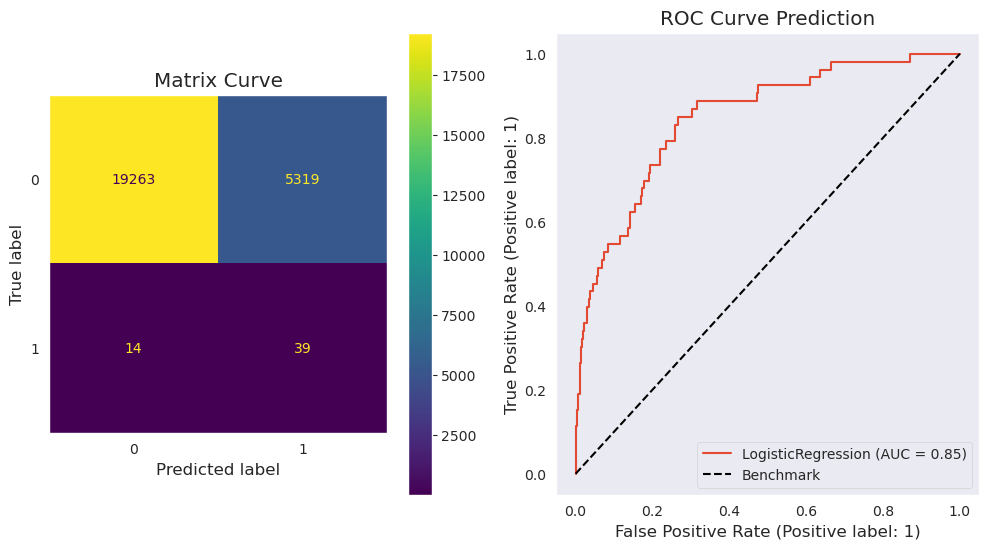

In [47]:
plot_classification_metrics(best_log_reg,y_test,X_test)

*

In [48]:
# separar variáveis independentes da variável dependente
X = credit_aproval.drop('Class', axis=1)
y = credit_aproval['Class']

# dividir dados de treino e de teste
## stratify= y (para dividir de forma que as classes tenham a mesma proporção)
## random_state para que o resultado seja replicável
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,
                                                    stratify=y, shuffle=True,
                                                    random_state=110)

In [49]:
X_train.shape

(114961, 21)

In [50]:
X_test.shape

(49270, 21)

## Adding Normalization

In [51]:
from utils.metrics import *

In [52]:

from sklearn.preprocessing import StandardScaler

X = credit_aproval.drop("Class", axis = 1)
y = credit_aproval["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.85, random_state = 42)



strat_kfold = StratifiedKFold(n_splits=10, shuffle=False)

params_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2']
}

pipe_lr = make_pipeline(StandardScaler(), 
                    GridSearchCV(LogisticRegression(class_weight='balanced',solver='liblinear',random_state = 42),
                                 param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                                             'penalty': ['l1', 'l2']},
                                 cv=strat_kfold ,
                                 scoring='roc_auc',
                                 n_jobs=-1,
                                 refit=True #refit with the best model
                                 ))






strat_kfold = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)



pipe_lr.fit(X_train,y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                              estimator=LogisticRegression(class_weight='balanced',
                                                           random_state=42,
                                                           solver='liblinear'),
                              n_jobs=-1,
                              param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                1000],
                                          'penalty': ['l1', 'l2']},
                              scoring='roc_auc'))])

In [53]:
def get_metrics(model,y_true,X_true):
    y_pred =  model.predict(X_true)
    y_pred_proba =  model.predict_proba(X_true)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba[:,-1] )
    auc = roc_auc_score(y_true, y_pred_proba[:,-1] )
    cm = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred)

    metrics = {
        'Accuracy' : accuracy,
        'Precision' : precision,
        'Recall' : recall,
        'F1-Score' : f1,
        'False Positive Ratio': fpr,
        'True Positive Ratio':tpr,
        'Thresholds':thresholds,
        'Area Under the Curve': auc,
        "Gini": round(2*auc-1,2),
        'Confussion Matrix' : cm,
        'Classification Report' : report

    }

    return metrics

In [54]:
train_metrics = get_metrics(pipe_lr,y_train,X_train)
test_metrics = get_metrics(pipe_lr,y_test,X_test)

In [55]:
display_metrics(train_metrics,test_metrics)

Accuracy  - Train :  0.818
Accuracy  - Test :  0.8204
----------------------------------------------------------------------------------------------------
Precision  - Train :  0.0074
Precision  - Test :  0.0097
----------------------------------------------------------------------------------------------------
Recall  - Train :  0.6643
Recall  - Test :  0.6143
----------------------------------------------------------------------------------------------------
F1-Score  - Train :  0.0146
F1-Score  - Test :  0.0191
----------------------------------------------------------------------------------------------------
Area Under the Curve  - Train :  0.8227
Area Under the Curve  - Test :  0.7997
----------------------------------------------------------------------------------------------------
Gini  - Train :  0.65
Gini  - Test :  0.6
----------------------------------------------------------------------------------------------------


In [56]:
test_metrics['Confussion Matrix']

array([[20167,  4398],
       [   27,    43]])

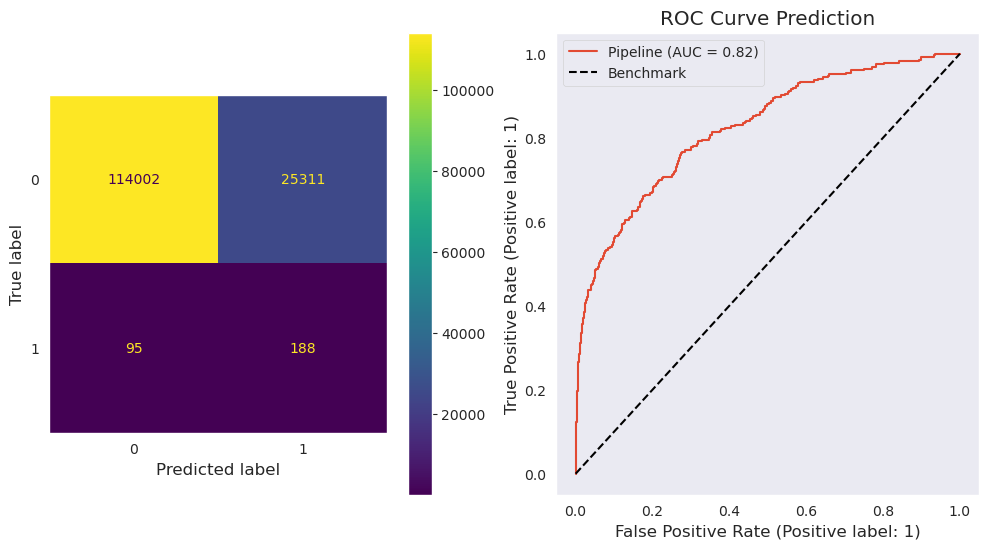

In [57]:
plot_classification_metrics(pipe_lr,y_train,X_train)

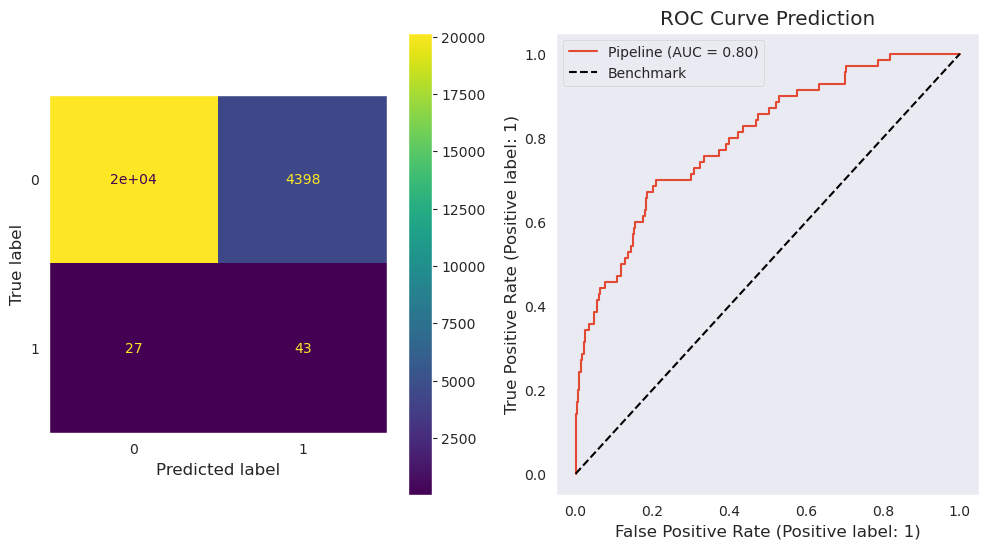

In [58]:
plot_classification_metrics(pipe_lr,y_test,X_test)

__________

# XGBoost

## Simple XGBoost

In [59]:
import xgboost as xgb    

# separar variáveis independentes da variável dependente
X = credit_aproval.drop('Class', axis=1)
y = credit_aproval['Class']

# dividir dados de treino e de teste

## stratify= y (para dividir de forma que as classes tenham a mesma proporção)
## random_state para que o resultado seja replicável
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,
                                                    stratify=y, shuffle=True,
                                                    random_state=110)

In [76]:
help(xgb.XGBClassifier)

Help on class XGBClassifier in module xgboost.sklearn:

class XGBClassifier(XGBModel, sklearn.base.ClassifierMixin)
 |  XGBClassifier(*, objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'binary:logistic', use_label_encoder: Optional[bool] = None, **kwargs: Any) -> None
 |  
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : int
 |          Number of boosting rounds.
 |  
 |      max_depth :  Optional[int]
 |          Maximum tree depth for base learners.
 |      max_leaves :
 |          Maximum number of leaves; 0 indicates no limit.
 |      max_bin :
 |          If using histogram-based algorithm, maximum number of bins per feature
 |      grow_policy :
 |          Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
 |          depth-wise. 1: favor splitting at nodes with highest loss change.
 |      learnin

In [75]:


xgb_cl = xgb.XGBClassifier(objective = "binary:logistic", n_estimators = 45, seed = 42, scale_pos_weight = 10)
avaliacao = [(X_train, y_train), (X_test, y_test)]

xgb_cl.fit(X_train, y_train, eval_metric = ["auc"], eval_set = avaliacao, verbose = True)
resultados_mod = xgb_cl.evals_result()

[0]	validation_0-auc:0.68664	validation_1-auc:0.63114
[1]	validation_0-auc:0.70176	validation_1-auc:0.63119
[2]	validation_0-auc:0.71121	validation_1-auc:0.65155
[3]	validation_0-auc:0.71685	validation_1-auc:0.64463
[4]	validation_0-auc:0.72884	validation_1-auc:0.65287
[5]	validation_0-auc:0.79976	validation_1-auc:0.67916
[6]	validation_0-auc:0.81012	validation_1-auc:0.72659
[7]	validation_0-auc:0.82138	validation_1-auc:0.72529
[8]	validation_0-auc:0.86827	validation_1-auc:0.74248
[9]	validation_0-auc:0.91050	validation_1-auc:0.76242
[10]	validation_0-auc:0.92966	validation_1-auc:0.78617
[11]	validation_0-auc:0.94672	validation_1-auc:0.79629
[12]	validation_0-auc:0.95782	validation_1-auc:0.80902
[13]	validation_0-auc:0.97077	validation_1-auc:0.80447
[14]	validation_0-auc:0.97290	validation_1-auc:0.79836
[15]	validation_0-auc:0.98521	validation_1-auc:0.79917
[16]	validation_0-auc:0.98823	validation_1-auc:0.79596
[17]	validation_0-auc:0.99300	validation_1-auc:0.78489
[18]	validation_0-au

In [61]:
# Prediçoes para o treinamento e teste

y_pred_train1 = xgb_cl.predict(X_train)
y_pred_test1 = xgb_cl.predict(X_test)

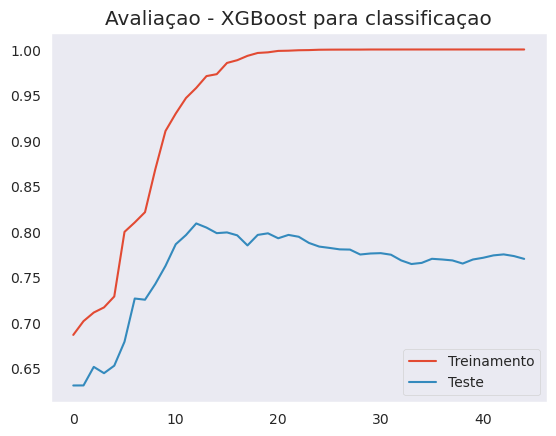

In [62]:
# Verificando o grafico de avaliaçao

x = len(resultados_mod["validation_0"]["auc"])
X_axis = range(0, x)
fig, ax = plt.subplots()
ax.plot(X_axis, resultados_mod["validation_0"]["auc"], label = "Treinamento")
ax.plot(X_axis, resultados_mod["validation_1"]["auc"], label = "Teste")
plt.title("Avaliaçao - XGBoost para classificaçao");
plt.legend(loc = "lower right");

In [64]:
train_metrics = get_metrics(xgb_cl,y_train,X_train)
test_metrics = get_metrics(xgb_cl,y_test,X_test)

In [65]:
display_metrics(train_metrics,test_metrics)

Accuracy  - Train :  0.9999
Accuracy  - Test :  0.9969
----------------------------------------------------------------------------------------------------
Precision  - Train :  0.9823
Precision  - Test :  0.0
----------------------------------------------------------------------------------------------------
Recall  - Train :  0.9788
Recall  - Test :  0.0
----------------------------------------------------------------------------------------------------
F1-Score  - Train :  0.9805
F1-Score  - Test :  0.0
----------------------------------------------------------------------------------------------------
Area Under the Curve  - Train :  1.0
Area Under the Curve  - Test :  0.7701
----------------------------------------------------------------------------------------------------
Gini  - Train :  1.0
Gini  - Test :  0.54
----------------------------------------------------------------------------------------------------


In [66]:
train_metrics['Confussion Matrix']

array([[139308,      5],
       [     6,    277]])

In [70]:
print(train_metrics['Classification Report'])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    139313
           1       0.98      0.98      0.98       283

    accuracy                           1.00    139596
   macro avg       0.99      0.99      0.99    139596
weighted avg       1.00      1.00      1.00    139596



In [67]:
test_metrics['Confussion Matrix']

array([[24559,     6],
       [   70,     0]])

In [71]:
print(test_metrics['Classification Report'])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24565
           1       0.00      0.00      0.00        70

    accuracy                           1.00     24635
   macro avg       0.50      0.50      0.50     24635
weighted avg       0.99      1.00      1.00     24635



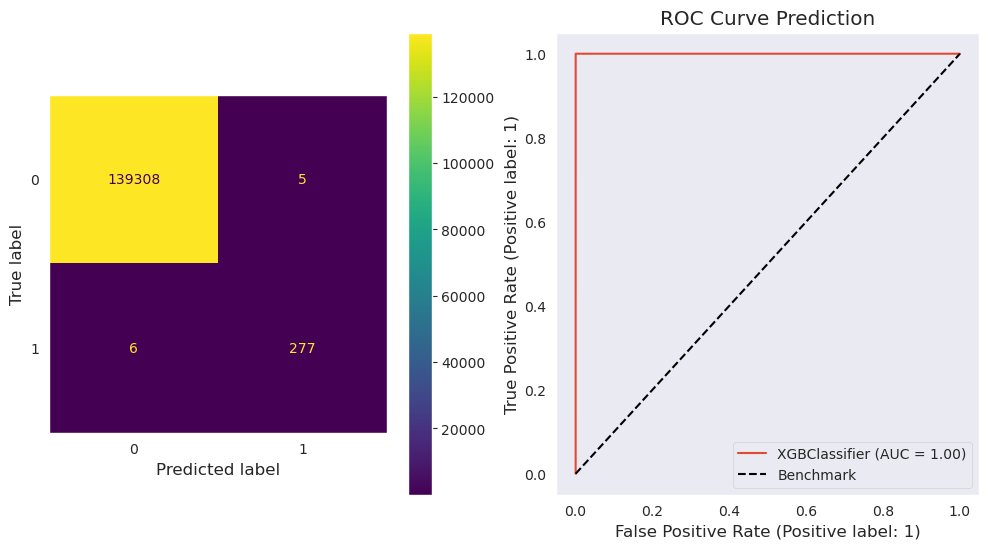

In [72]:
plot_classification_metrics(xgb_cl,y_train,X_train)

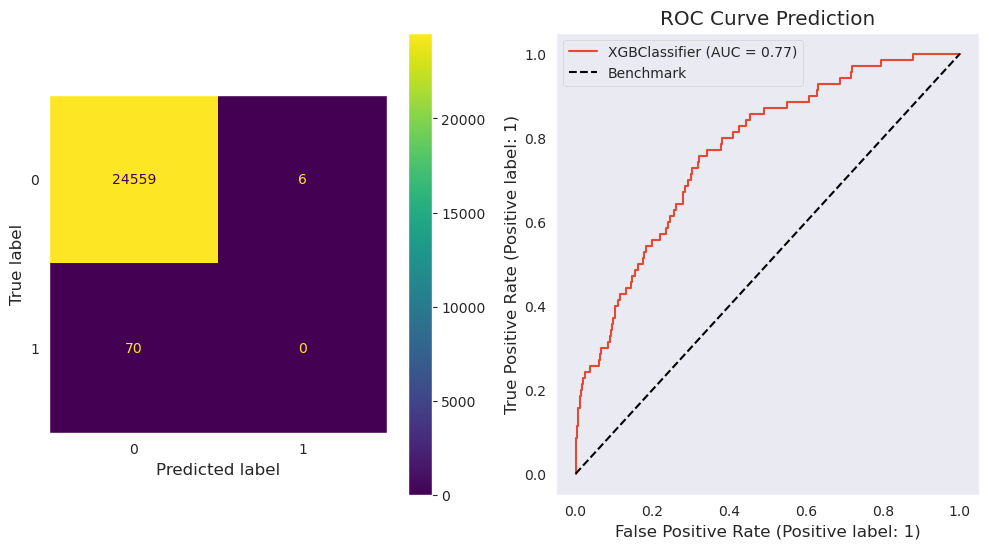

In [73]:
plot_classification_metrics(xgb_cl,y_test,X_test)

In [83]:
credit_aproval.iloc[:,:-1]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
id,,,,,,,,,,,,,,,,,,,,,
1,-0.299468,0.533339,0.592928,0.094916,0.015414,0.019142,0.045814,0.177430,-0.040845,-0.201868,...,-0.165179,-0.006907,0.082039,0.783691,0.046401,-0.181900,0.201659,0.186339,0.052175,0.081669
2,0.529493,-0.094837,0.341711,0.568313,-0.318345,0.201856,-0.302414,0.208240,0.290601,-0.005605,...,0.176963,-0.934574,0.248362,0.231307,-0.121390,0.045858,-0.088862,-0.320489,-0.132945,0.051778
3,0.605630,-0.024632,-0.042535,-0.023267,-0.135464,-0.141456,0.093773,-0.093751,-0.586908,0.282549,...,0.354953,0.681119,-0.082467,-0.037362,-0.923501,0.024895,0.135814,-0.367899,-0.084424,-0.273891
4,-0.346173,0.647783,0.473604,-0.165712,0.127780,-0.221239,0.295904,0.076857,-0.220782,-0.110628,...,0.101733,0.560604,0.001884,0.409169,0.236170,-0.362497,-0.085438,0.210089,0.112295,-0.136954
5,0.240050,-0.688908,0.525568,0.434648,-0.371745,0.799044,-0.332958,0.227423,0.783561,-0.423634,...,0.816570,0.561863,-0.483898,0.041915,-0.616440,0.548586,-0.956886,-0.379454,0.235959,0.035924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164227,0.945540,-0.636454,-1.891954,-0.694469,1.006394,1.333040,0.075870,0.200967,-0.551412,0.429079,...,0.003988,-0.062475,0.457187,-0.036584,-1.154964,-0.020712,0.595263,-0.140924,-0.097852,-0.090685
164228,0.069862,0.474324,-1.456827,-1.092415,0.941858,-0.528412,0.862812,0.009045,-0.411747,-0.128967,...,0.258073,-0.035620,0.655400,-0.946454,-0.159390,-0.458698,0.049198,-0.097779,-0.058269,0.245734
164229,1.029171,-0.019496,-0.964276,0.165058,0.135064,-0.367832,-0.086939,0.072412,0.424644,-0.068249,...,-0.884821,-1.968847,0.015673,0.014050,0.441783,0.195901,0.503895,0.151688,-0.192415,-0.153320


Text(0.5, 1.0, 'Feature Importance')

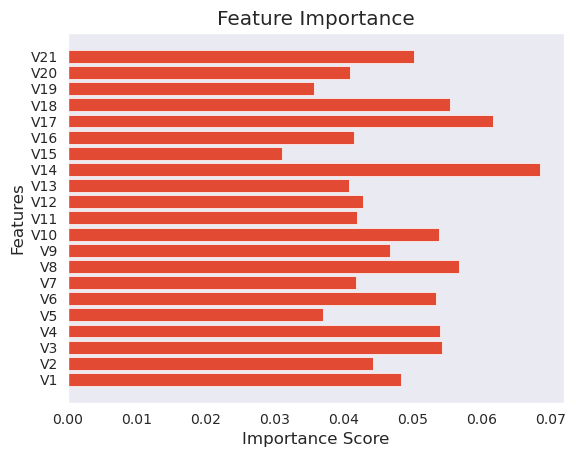

In [86]:
feature_importance = xgb_cl.feature_importances_

plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), credit_aproval.iloc[:,:-1].columns)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
